In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 samples
n_samples=1000

In [3]:
#Create Labels and Features
X,y=make_circles(n_samples,noise=0.03,random_state=42)

Lets Visualize the data as it is hard to understand

In [4]:
import pandas as pd 

In [5]:
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Visualize it with  a Plot 

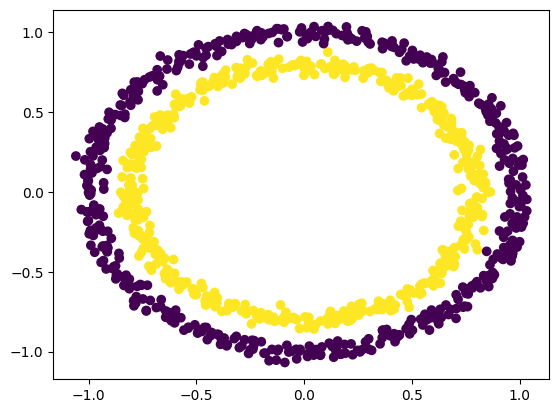

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(circles["X0"],circles["X1"],c=y)
plt.show()

Second Way of Visualization

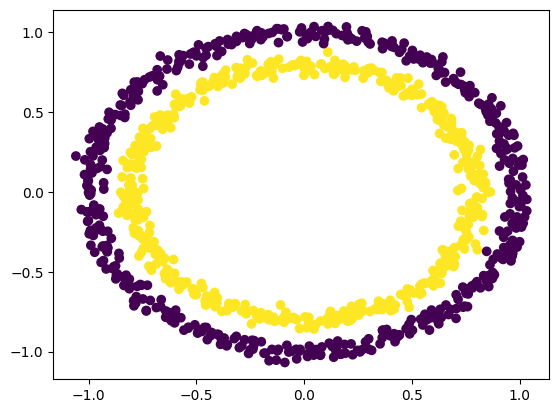

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

Model Creation


In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)
# Model 1 
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model1.fit(X,y,epochs=5,verbose=0)

In [12]:
model1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4970 - loss: 0.6935


[0.6935181617736816, 0.4970000088214874]

Improve model by introducing a hidden a layer

In [13]:
tf.random.set_seed(42)
# Model 2 
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model2.fit(X,y,epochs=100,verbose=0)

In [14]:
model2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 7.9712


[7.971191883087158, 0.5]

Again Try to improve again by changing optimizer , increasing hidden units and layers

In [15]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(X,y,epochs=100,verbose=0)

In [16]:
model3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4930 - loss: 0.6958


[0.6957743763923645, 0.49300000071525574]

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model,X,y):

    # Define axis boundraies for of the plot and create a meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
    y_min,y_max=X[:,1].min()+0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    # Create X value to make predictions on these
    x_in=np.c_[xx.ravel(),yy.ravel()]   # Stacks 2d array together

    # Make Predictions
    y_pred=model.predict(x_in)
    
    # check for multi-class 
    if len(y_pred[0])>1:
        print('You are doing multi-class classification')
        # Reshape Predictions to get ready for plotting 
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing Binary Classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    # Plot Decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Doing Binary Classification


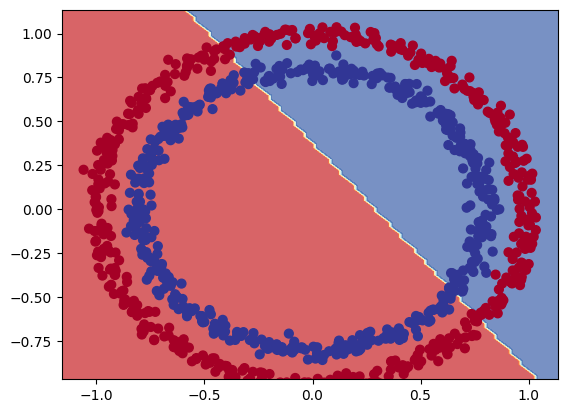

In [19]:
plot_decision_boundary(model3,X,y)

as our model is predicting a straight line 
lets try to fit it on straight data or linear data 


In [20]:
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)
len(X_regression),len(y_regression)

(200, 200)

In [21]:
# Train Test Split

X_train_regression = tf.expand_dims(X_regression[:150], axis=-1)  # Shape: (150, 1)
X_test_regression  = tf.expand_dims(X_regression[150:], axis=-1)  # Shape: (50, 1)

y_train_regression=y_regression[:150]
y_test_regression=y_regression[150:]




In [22]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model3.fit(X_train_regression,y_train_regression,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 447.2567 - mae: 447.2567
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 403.4591 - mae: 403.4591 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 352.8857 - mae: 352.8857
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 294.8553 - mae: 294.8553
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 232.2339 - mae: 232.2339
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 169.1266 - mae: 169.1266
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 102.3353 - mae: 102.3353
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 47.2828 - mae: 47.2828
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 59.1624 - mae: 59.1624
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 63.7518 - mae: 63.7518
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 51.8676 - mae: 51.8676 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 42.1778 - mae: 42.1778 
Epoch 13

In [23]:
y_pred_reg=model3.predict(X_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


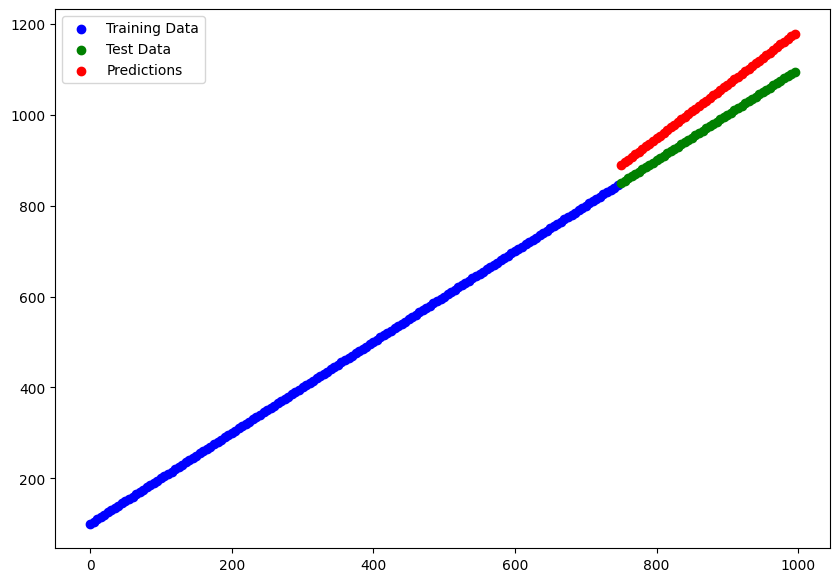

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg,c='r',label='Predictions')
plt.legend();

In [25]:
tf.random.set_seed(42)
# Model3 Improvised
model3_improvised=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3_improvised.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])
model3_improvised.fit(X_train_regression,y_train_regression,epochs=230)

Epoch 1/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 440.4891 - mae: 440.4891
Epoch 2/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 172.9041 - mae: 172.9041
Epoch 3/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 123.2482 - mae: 123.2482
Epoch 4/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 100.4913 - mae: 100.4913
Epoch 5/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 73.8906 - mae: 73.8906 
Epoch 6/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 69.8695 - mae: 69.8695 
Epoch 7/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 51.8121 - mae: 51.8121 
Epoch 8/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 46.8831 - mae: 46.8831
Epoch 9/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 44.9203 - mae: 44.9203
Epoch 10/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 45.5174 - mae: 45.5174
Epoch 11/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 40.5223 - mae: 40.5223 
Epoch 12/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 40.9765 - mae: 40.9765
Epoch 13/230


In [26]:
y_pred_reg_improvised=model3_improvised.predict(X_test_regression)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/stepWARNING:tensorflow:6 out of the last 317 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002189981C540> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


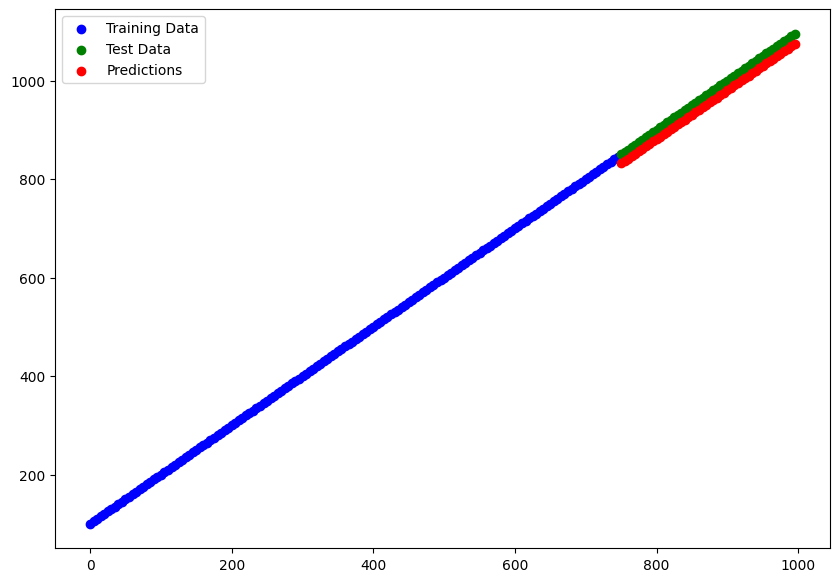

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg_improvised,c='r',label='Predictions')
plt.legend();

In [28]:
model3_improvised.evaluate(X_test_regression,y_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 19.3984 - mae: 19.3984 


[19.39837074279785, 19.39837074279785]

**Lets now See Linearity and Non-linearity**
> Staright and Not-Straight Lines

In [38]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
model_4.fit(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4770 - loss: 5.9553


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


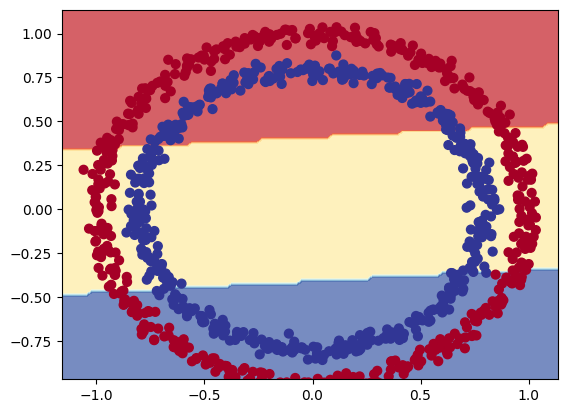

In [39]:
plot_decision_boundary(model_4,X,y)